**Step-1: Import the Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

**Step-2: Load the Datasets**

In [11]:
df = pd.read_csv(
    r"C:\Users\sangi\Downloads\excel_data\daily-minimum-temperatures-in-me.csv",
    on_bad_lines='skip'
)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


**Step-3: EDA**

In [19]:
df.columns

Index(['Date', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990'], dtype='object')

In [38]:
df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].head(10)
df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].dtype

dtype('O')

In [40]:
df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = pd.to_numeric(df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'],
                                                                                    errors='coerce')

In [42]:
df = df.dropna(subset=['Daily minimum temperatures in Melbourne, Australia, 1981-1990'])

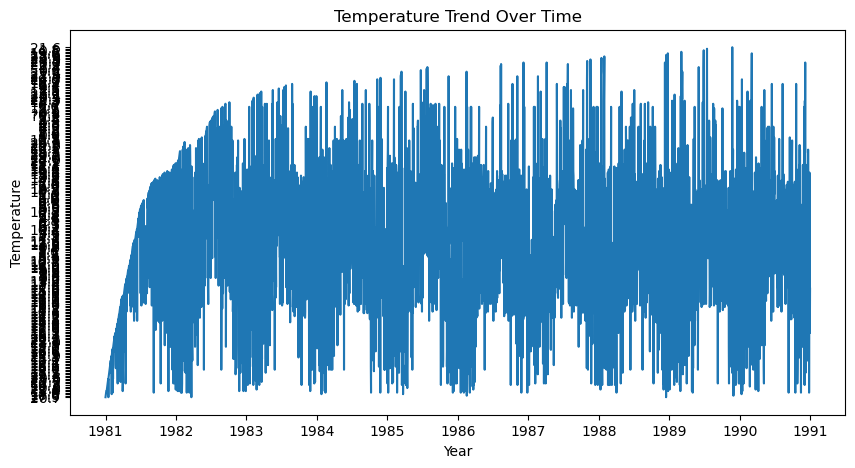

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'])
plt.title("Temperature Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

**Step-4: Feature Engineering**

In [44]:
df['Day'] = range(len(df))
X = df[['Day']]
y = df['Daily minimum temperatures in Melbourne, Australia, 1981-1990']

**Step 5: Train-Test Split**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

**Step 6: Train Regression Model**

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Step 7: Prediction & Evaluation**

In [53]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: -0.012719558273846632
MAE: 3.40178069603627


**Step 8: Plot Predictions**

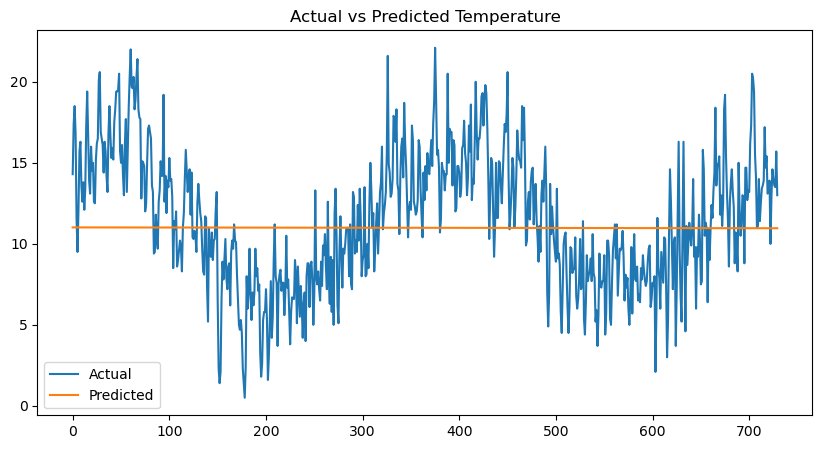

In [56]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Temperature")
plt.show()